In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


# Data Visualization

In [6]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Pregnancies', ylabel='Density'>

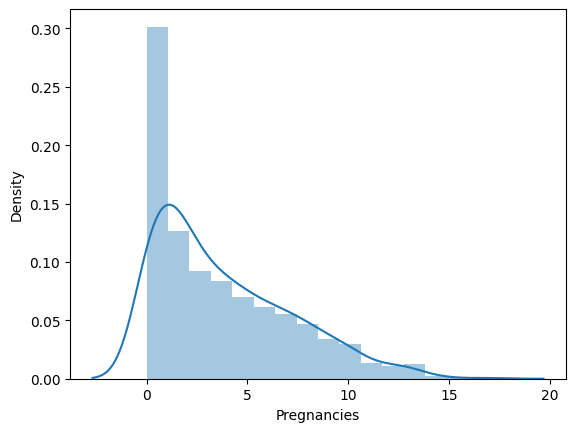

In [7]:
sns.distplot(df['Pregnancies'])

<Axes: xlabel='Glucose', ylabel='Density'>

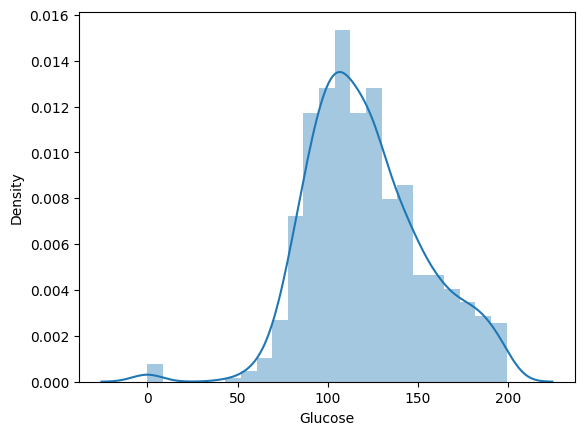

In [8]:
sns.distplot(df['Glucose'])

<Axes: xlabel='BloodPressure', ylabel='Density'>

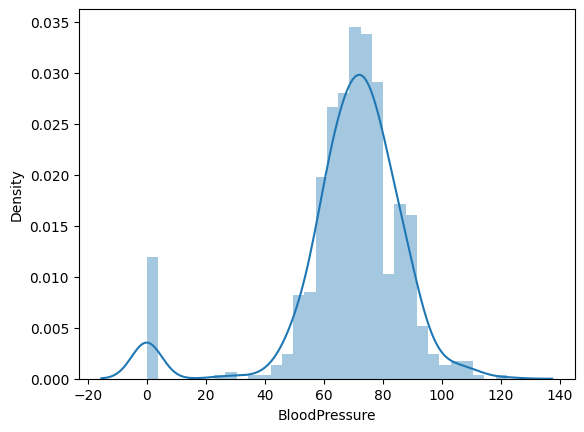

In [9]:
sns.distplot(df['BloodPressure'])

<Axes: xlabel='SkinThickness', ylabel='Density'>

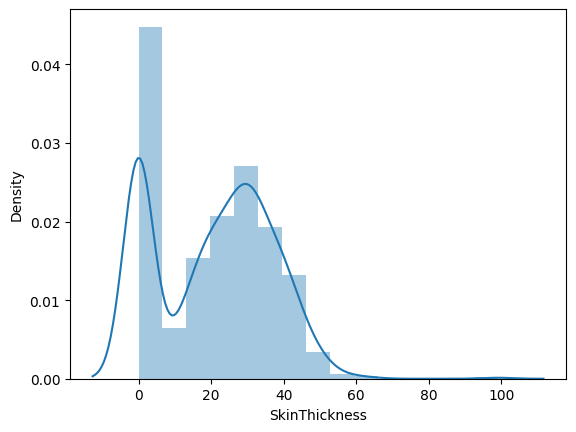

In [10]:
sns.distplot(df['SkinThickness'])

<Axes: xlabel='Insulin', ylabel='Density'>

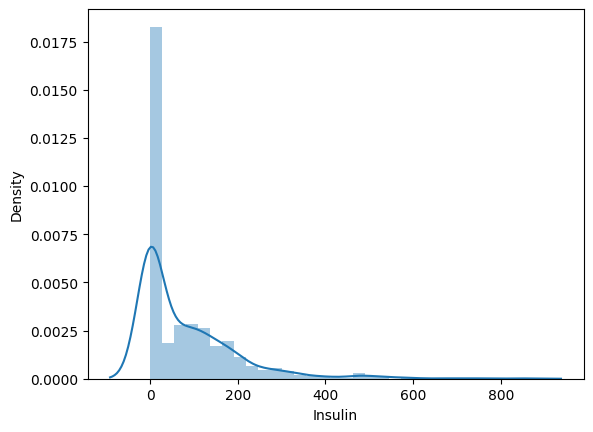

In [11]:
sns.distplot(df['Insulin'])

<Axes: xlabel='BMI', ylabel='Density'>

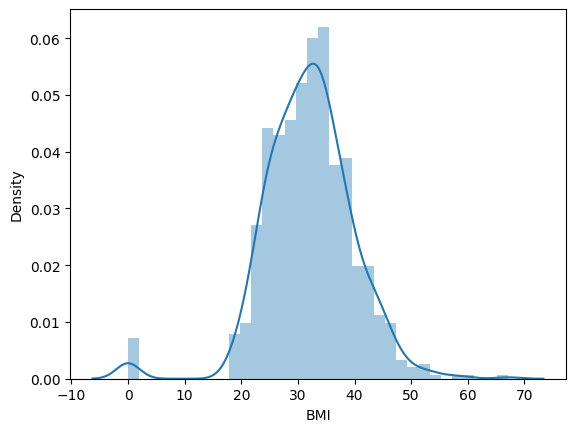

In [12]:
sns.distplot(df['BMI'])

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Density'>

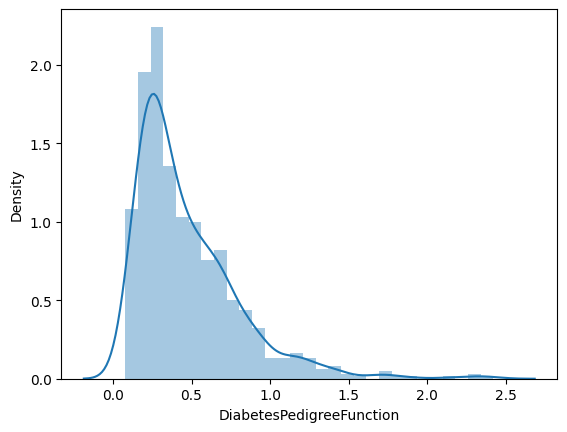

In [13]:
sns.distplot(df['DiabetesPedigreeFunction'])

<Axes: xlabel='Age', ylabel='Density'>

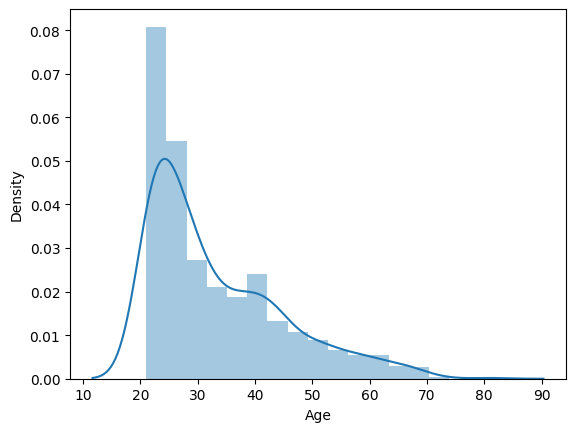

In [14]:
sns.distplot(df['Age'])

# Preprocessing

In [15]:
columns_to_check = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'] 

### Remove suspicious data with zeroes

In [16]:
columns_to_replace_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_replace_zeros] = df[columns_to_replace_zeros].replace(0, pd.NA)

# Remove rows with NaN (null) values in any of the selected columns
df = df.dropna(subset=columns_to_replace_zeros)

In [17]:
df.shape

(392, 9)

### Cleaning Outliers for Integer Data Type

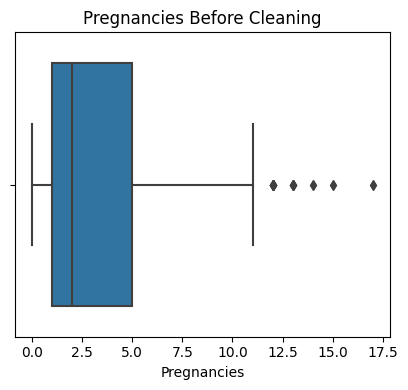

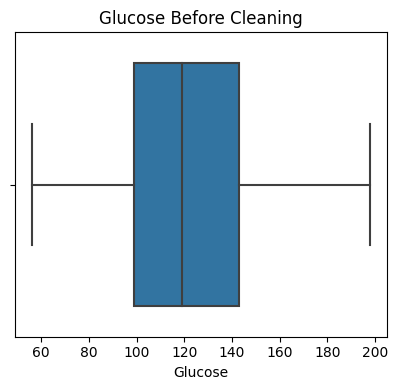

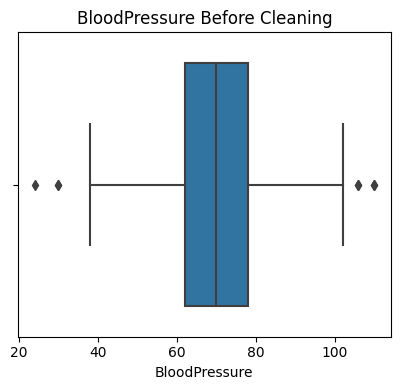

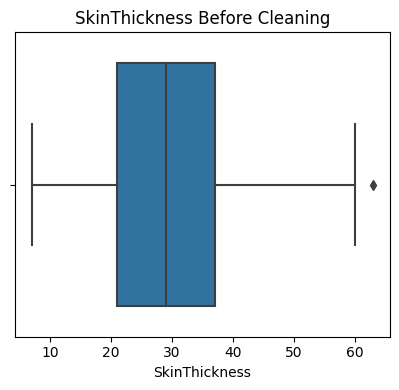

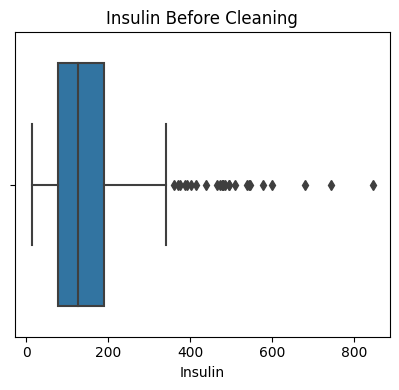

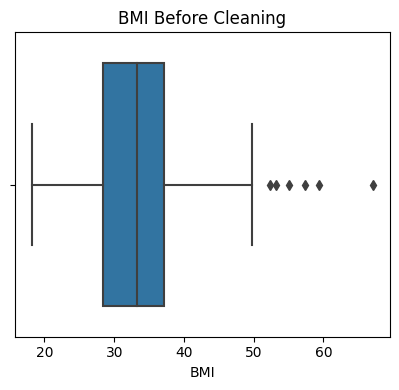

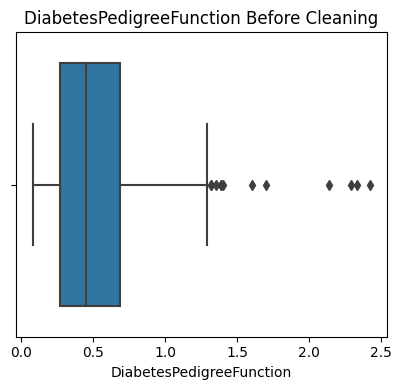

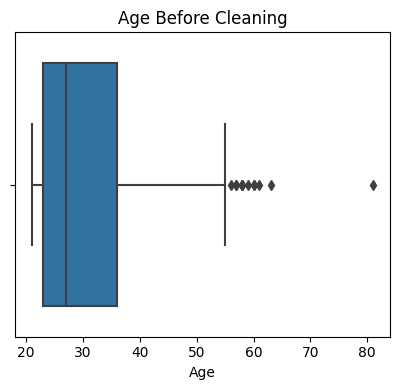

In [18]:
for column_name in columns_to_check:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column_name])  
    plt.title(f'{column_name} Before Cleaning') 
    
    plt.tight_layout()
    plt.show()

In [19]:
df.shape

(392, 9)

In [20]:

# Loop through the columns and apply the IQR-based outlier detection and removal
for column_name in columns_to_check:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[column_name] >= Q1 - 1.5*IQR) & (df[column_name] <= Q3 + 1.5*IQR)]

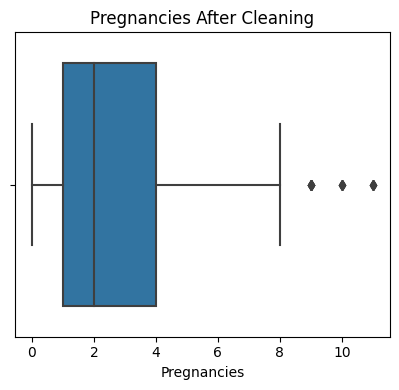

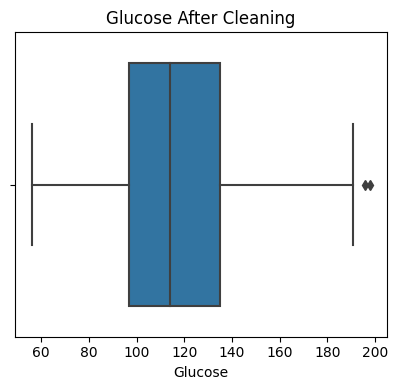

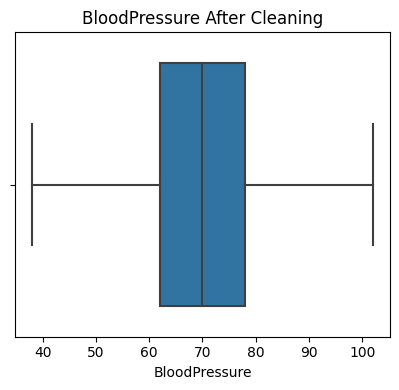

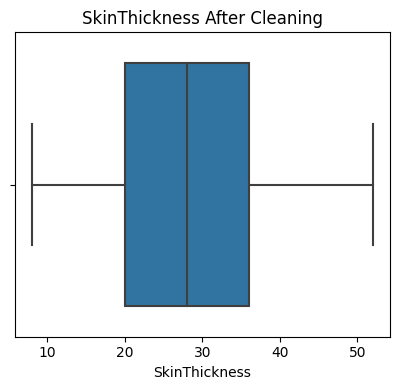

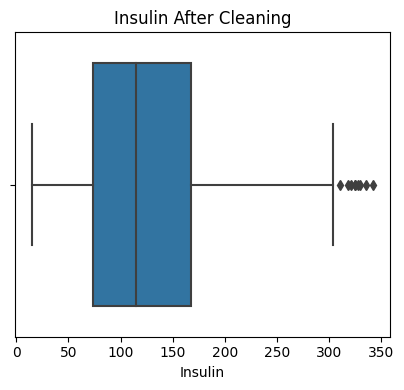

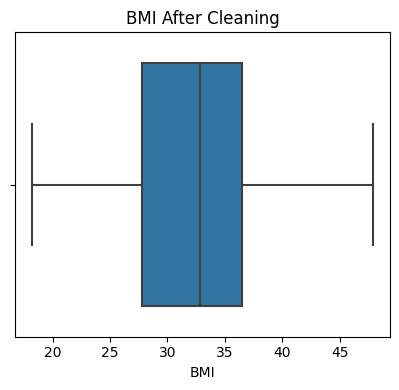

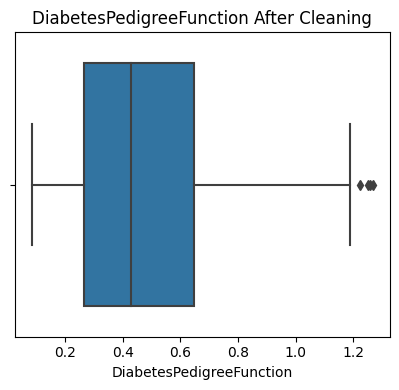

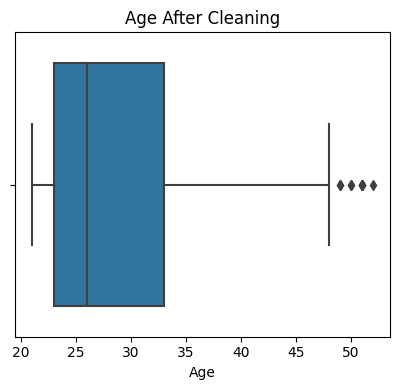

In [21]:
for column_name in columns_to_check:
    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=df[column_name])  
    plt.title(f'{column_name} After Cleaning') 
    plt.tight_layout()
    plt.show()

In [22]:
df.shape

(321, 9)

# Feature Engineering
### Create Categorical Features

**Glucose**

In [23]:
def categorize_glucose(glucose):
    if glucose < 70:
        return 'Hypoglycemia'
    elif glucose < 100:
        return 'Normal Glucose'
    elif glucose < 126:
        return 'Prediabetes'
    else:
        return 'Diabetes'

df['Glucose_Category'] = df['Glucose'].apply(categorize_glucose)

In [24]:
df.groupby("Glucose_Category").agg({"Outcome": ["mean","count"]})

Outcome      
                      mean count
Glucose_Category                
Diabetes          0.531532   111
Hypoglycemia      0.000000     3
Normal Glucose    0.054348    92
Prediabetes       0.200000   115

<BarContainer object of 4 artists>

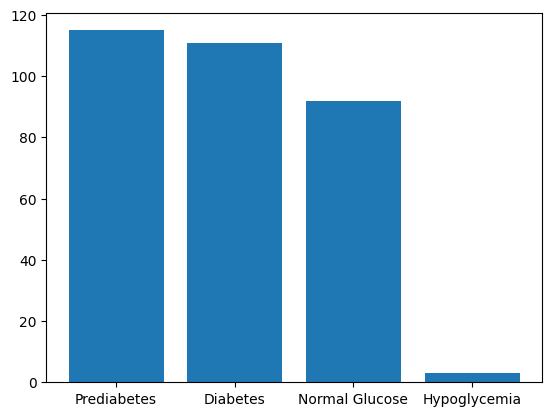

In [25]:
plt.bar(df['Glucose_Category'].value_counts().index, df['Glucose_Category'].value_counts().values)

**Insulin**

In [26]:
def categorize_insulin(insulin):
    if insulin < 30:
        return 'Low Insulin'
    elif insulin < 120:
        return 'Normal Insulin'
    else:
        return 'High Insulin'

df['Insulin_Category'] = df['Insulin'].apply(categorize_insulin)

In [27]:
df.groupby("Insulin_Category").agg({"Outcome": ["mean","count"]})

Outcome      
                      mean count
Insulin_Category                
High Insulin      0.439490   157
Low Insulin       0.000000     6
Normal Insulin    0.113924   158

<BarContainer object of 3 artists>

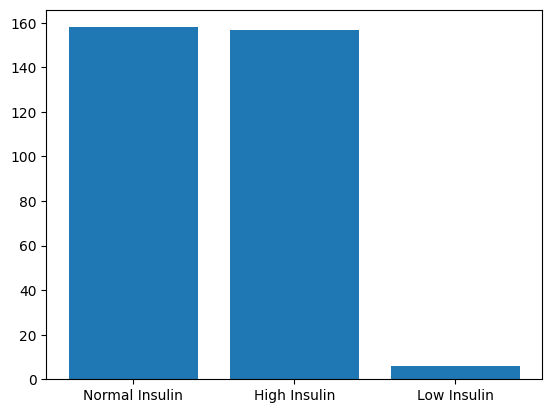

In [28]:
plt.bar(df['Insulin_Category'].value_counts().index, df['Insulin_Category'].value_counts().values)

**Age**

In [29]:
def categorize_age(age):
    if age < 18:
        return 'Children'
    elif age < 31:
        return 'Young Adult'
    elif age < 45:
        return 'Middle Aged Adult'
    elif age < 60:
        return 'Old Adult'
    else:
        return 'Senior'

df['Age_Category'] = df['Age'].apply(categorize_age)

In [30]:
df.groupby("Age_Category").agg({"Outcome": ["mean","count"]})

Outcome      
                       mean count
Age_Category                     
Middle Aged Adult  0.487179    78
Old Adult          0.578947    19
Young Adult        0.169643   224

<BarContainer object of 3 artists>

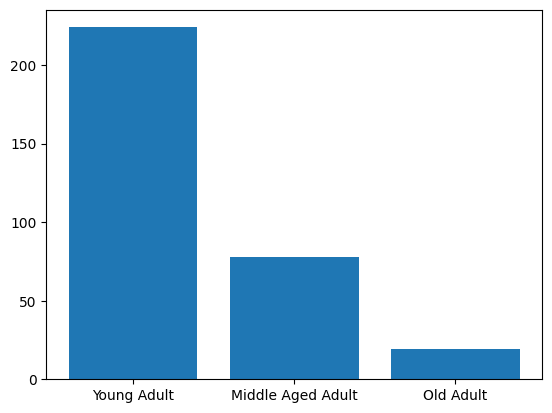

In [31]:
plt.bar(df['Age_Category'].value_counts().index, df['Age_Category'].value_counts().values)

In [32]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Category,Insulin_Category,Age_Category
3,1,89,66,23,94,28.1,0.167,21,0,Normal Glucose,Normal Insulin,Young Adult
6,3,78,50,32,88,31.0,0.248,26,1,Normal Glucose,Normal Insulin,Young Adult
14,5,166,72,19,175,25.8,0.587,51,1,Diabetes,High Insulin,Old Adult
16,0,118,84,47,230,45.8,0.551,31,1,Prediabetes,High Insulin,Middle Aged Adult
19,1,115,70,30,96,34.6,0.529,32,1,Prediabetes,Normal Insulin,Middle Aged Adult


### Conversion of Categorical Variable to One-Hot Encoding

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float] and df[col].nunique() == 2]

In [34]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


for col in binary_cols:
    df = label_encoder(df, col)

In [35]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

In [36]:
df = one_hot_encoder(df, ohe_cols)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Glucose_Category_Hypoglycemia,Glucose_Category_Normal Glucose,Glucose_Category_Prediabetes,Insulin_Category_Low Insulin,Insulin_Category_Normal Insulin,Age_Category_Old Adult,Age_Category_Young Adult
3,1,89,66,23,94,28.1,0.167,21,0,False,True,False,False,True,False,True
6,3,78,50,32,88,31.0,0.248,26,1,False,True,False,False,True,False,True
14,5,166,72,19,175,25.8,0.587,51,1,False,False,False,False,False,True,False
16,0,118,84,47,230,45.8,0.551,31,1,False,False,True,False,False,False,False
19,1,115,70,30,96,34.6,0.529,32,1,False,False,True,False,True,False,False


In [37]:
df.shape

(321, 16)

# Training and Test Split

In [60]:
from sklearn.model_selection import train_test_split

X = df.drop(['Pregnancies', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Outcome'], axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
df.drop(['Pregnancies', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Outcome'], axis=1)

,Glucose,Insulin,Age,Glucose_Category_Hypoglycemia,Glucose_Category_Normal Glucose,Glucose_Category_Prediabetes,Insulin_Category_Low Insulin,Insulin_Category_Normal Insulin,Age_Category_Old Adult,Age_Category_Young Adult
3,89,94,21,False,True,False,False,True,False,True
6,78,88,26,False,True,False,False,True,False,True
14,166,175,51,False,False,False,False,False,True,False
16,118,230,31,False,False,True,False,False,False,False
19,115,96,32,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
748,187,200,36,False,False,False,False,False,False,False
751,121,74,28,False,False,True,False,True,False,True
755,128,110,37,False,False,False,False,True,False,False
760,88,16,22,False,True,False,True,False,False,True


### Standardizing the Values

In [62]:
clf = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=5, 
                                                                  min_samples_split=2, 
                                                                  min_samples_leaf=2)
clf.fit(X_train, y_train) 

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=0)

In [63]:
y_preds = clf.predict(X_test)

In [64]:
X_test.shape

(65, 10)

In [65]:
print("Accuracy %.4f" % accuracy_score(y_test, y_preds))
print("Precision %.4f" % precision_score(y_test, y_preds))
print("Recall %.4f" % recall_score(y_test, y_preds))
print("F1 %.4f" % f1_score(y_test, y_preds))

Accuracy 0.7538
Precision 0.7143
Recall 0.4545
F1 0.5556


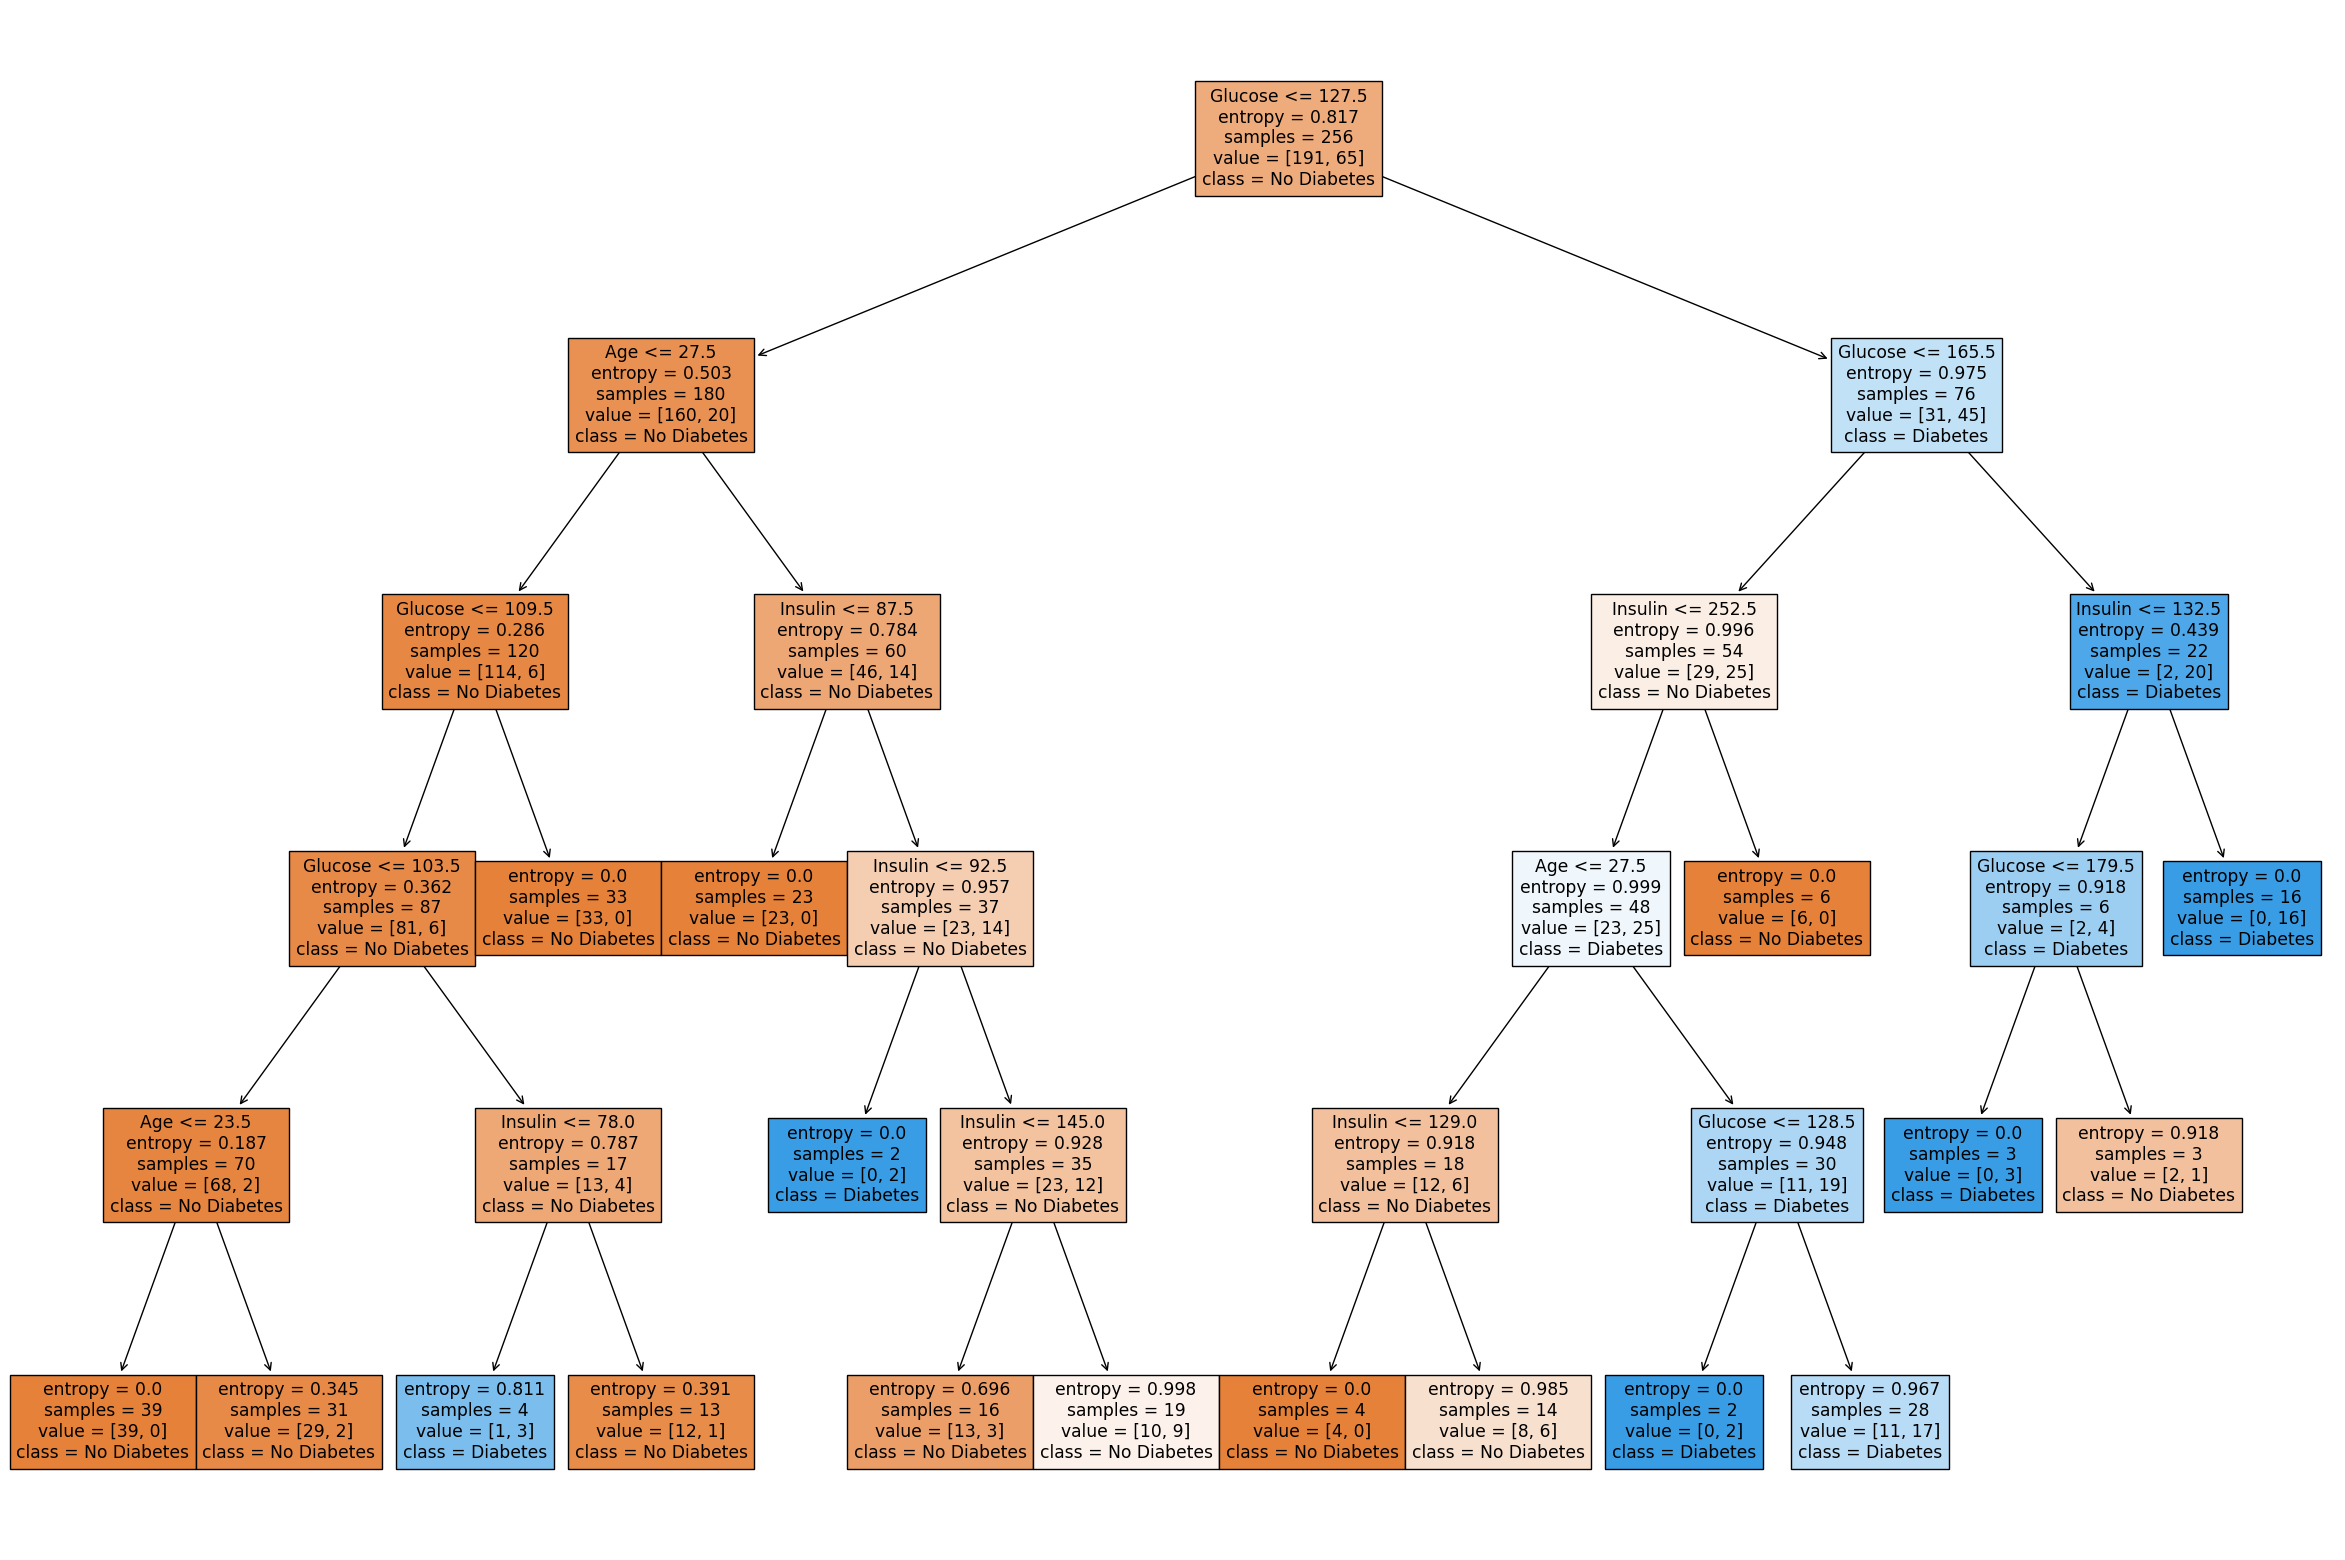

In [66]:
plt.figure(figsize=(30, 20))
plot_tree(clf, 
          feature_names=list(X.columns),
          class_names=['No Diabetes', 'Diabetes'],
          filled=True)

plt.savefig('decision_tree_plot.png')

# Miscellaneous

### Feature Importance

**Random Forest Classifier**

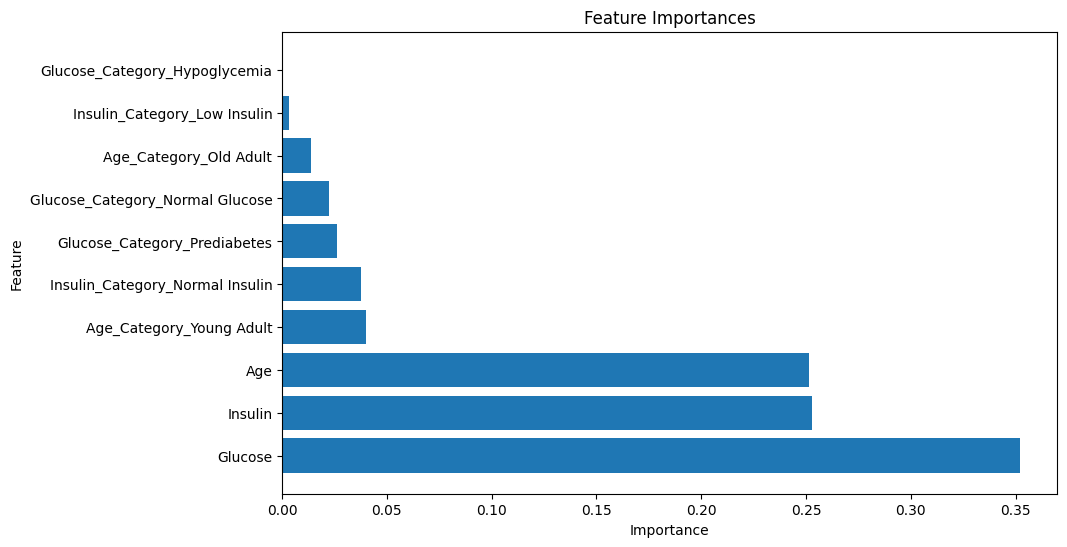

In [67]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

feature_importances = model.feature_importances_
feature_names = X_train.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Create a bar plot to visualize feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()


In [68]:
print(feature_importance_df)

                           Feature  Importance
0                          Glucose    0.352157
1                          Insulin    0.252935
2                              Age    0.251205
9         Age_Category_Young Adult    0.039902
7  Insulin_Category_Normal Insulin    0.037822
5     Glucose_Category_Prediabetes    0.026086
4  Glucose_Category_Normal Glucose    0.022498
8           Age_Category_Old Adult    0.013931
6     Insulin_Category_Low Insulin    0.003177
3    Glucose_Category_Hypoglycemia    0.000288


**Recursive Feature Elimination**

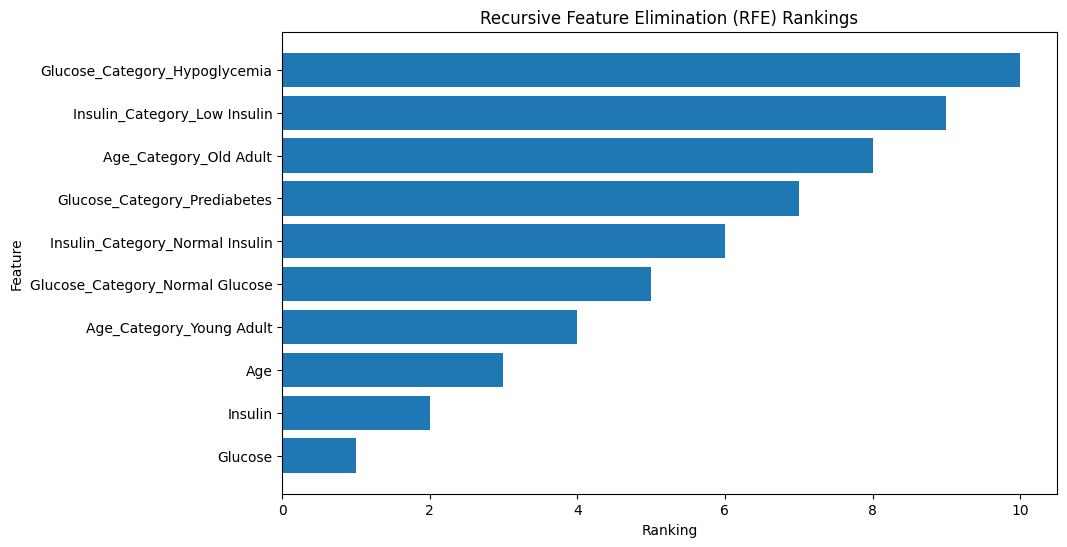

In [69]:
from sklearn.feature_selection import RFE

# Create an estimator (e.g., RandomForestClassifier)
estimator = RandomForestClassifier()

# Perform RFE
rfe = RFE(estimator, n_features_to_select=1)
rfe.fit(X_train, y_train)

# Get feature ranking
feature_ranking = rfe.ranking_

# Create a DataFrame to store feature names and their rankings
ranking_df = pd.DataFrame({'Feature': feature_names, 'Ranking': feature_ranking})
ranking_df = ranking_df.sort_values(by='Ranking')

plt.figure(figsize=(10, 6))
plt.barh(ranking_df['Feature'], ranking_df['Ranking'])
plt.xlabel('Ranking')
plt.ylabel('Feature')
plt.title('Recursive Feature Elimination (RFE) Rankings')
plt.show()


In [70]:
print(ranking_df)

                           Feature  Ranking
0                          Glucose        1
1                          Insulin        2
2                              Age        3
9         Age_Category_Young Adult        4
4  Glucose_Category_Normal Glucose        5
7  Insulin_Category_Normal Insulin        6
5     Glucose_Category_Prediabetes        7
8           Age_Category_Old Adult        8
6     Insulin_Category_Low Insulin        9
3    Glucose_Category_Hypoglycemia       10


### Confusion Matrix

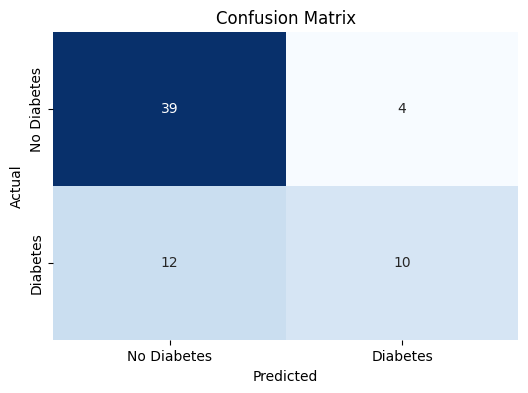

In [71]:
from sklearn.metrics import confusion_matrix

# Actual target values
y_true = y_test  

# Create a confusion matrix
confusion = confusion_matrix(y_true, y_preds)

# Create custom labels for the axes
labels = ['No Diabetes', 'Diabetes']

# Create a heatmap with custom labels
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()